<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span><ul class="toc-item"><li><span><a href="#Таблица-contract" data-toc-modified-id="Таблица-contract-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Таблица contract</a></span></li><li><span><a href="#Таблица-personal" data-toc-modified-id="Таблица-personal-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Таблица personal</a></span></li><li><span><a href="#Таблица-internet" data-toc-modified-id="Таблица-internet-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Таблица internet</a></span></li><li><span><a href="#Таблица-phone" data-toc-modified-id="Таблица-phone-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Таблица phone</a></span></li></ul></li><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Таблица-contract" data-toc-modified-id="Таблица-contract-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Таблица contract</a></span><ul class="toc-item"><li><span><a href="#Добавим-столбец-target" data-toc-modified-id="Добавим-столбец-target-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Добавим столбец target</a></span></li><li><span><a href="#Первичный-осмотр" data-toc-modified-id="Первичный-осмотр-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Первичный осмотр</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Замена типа данных</a></span><ul class="toc-item"><li><span><a href="#Поле-TotalCharges" data-toc-modified-id="Поле-TotalCharges-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Поле TotalCharges</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Поле-BeginDate" data-toc-modified-id="Поле-BeginDate-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Поле BeginDate</a></span></li><li><span><a href="#Поле-EndDate" data-toc-modified-id="Поле-EndDate-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Поле EndDate</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Поле-customerID" data-toc-modified-id="Поле-customerID-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Поле customerID</a></span></li><li><span><a href="#Поле-BeginDate" data-toc-modified-id="Поле-BeginDate-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Поле BeginDate</a></span></li><li><span><a href="#Поле-TotalCharges" data-toc-modified-id="Поле-TotalCharges-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Поле TotalCharges</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Таблица-personal" data-toc-modified-id="Таблица-personal-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Таблица personal</a></span></li><li><span><a href="#Таблица-internet" data-toc-modified-id="Таблица-internet-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Таблица internet</a></span></li><li><span><a href="#Таблица-phone" data-toc-modified-id="Таблица-phone-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Таблица phone</a></span></li></ul></div>

# Исследовательский анализ данных

## Описание данных 

### Таблица contract

- customerID - id пользователя 
- BeginDate - дата начала действия 
- EndDate - дата окончания действия 
- Type - Тип оплаты (раз в год или помесячно)
- PaperlessBilling - безбумажный расчетный лист 
- PaymentMethod - тип платежа
- MonthlyCharges - расход за месяц
- TotalCharges - общие расходы

### Таблица personal

- customerID - id пользователя
- gender - пол
- SeniorCitizen - пожилой гражданин
- Partner - партнер
- Dependents - иждивенцы

### Таблица internet

- customerID - id пользователя 
- InternetService - Нет описания (интернет безопасность)
- OnlineSecurity - блокировка небезопасных сайтов 
- OnlineBackup - Облачное хранилище файлов для резервного копирования данных 
- DeviceProtection - антивирус 
- TechSupport - Выделенная линия технической поддержки
- StreamingTV - Стриминговое телевидение
- StreamingMovies - каталог фильмов

### Таблица phone

- customerID - id пользователя 
- MultipleLines - Подключение телефонного аппарата к нескольким линиям одновременно

Информация о договорах актуальна на 1 февраля 2020.

Целевой признак: столбец `'EndDate'` равен `'No'`.

## Подключение библиотек 

In [1]:
import pandas as pd
import numpy as np

## Таблица contract

In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')

### Добавим столбец target

In [3]:
contract['target'] = contract['EndDate'] == 'No'

TRUE  - не ушел

FALSE - ушел

### Первичный осмотр 

In [4]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,True
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,True
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,False
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,True
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,False


In [5]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID          7043 non-null object
BeginDate           7043 non-null object
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
target              7043 non-null bool
dtypes: bool(1), float64(1), object(7)
memory usage: 447.2+ KB


#### Вывод

Таблица не содержит пустых значений, не правильный тип у следующих полей:
- BeginDate - date
- EndDate - date
- TotalCharges - float

### Замена типа данных

#### Поле TotalCharges

In [6]:
contract['TotalCharges'] = contract['TotalCharges'].str.strip()

In [7]:
contract.loc[[488, 753,936,1082,1340]]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,True
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,True
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,True
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,True
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,True


In [8]:
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'])

In [9]:
contract[contract['TotalCharges'].isna()].head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,True
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN,True
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN,True
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN,True
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN,True


##### Вывод

Замена типа не испортила данные, эти поля и были пустые 

#### Поле BeginDate

In [10]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')

#### Поле EndDate

In [11]:
contract['EndDate'] = contract['EndDate'].replace('No', np.nan)

In [12]:
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d %H:%M:%S')

#### Вывод

In [13]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,True
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,True
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,False
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,True
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,False


In [14]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             1869 non-null datetime64[ns]
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
target              7043 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(2), object(4)
memory usage: 447.2+ KB


Замена типов произведена корректно 

### Поле customerID

In [19]:
contract['customerID'].duplicated().sum()

0

Дубликатов не обнаружено

### Поле BeginDate

In [16]:
contract['BeginDate'].describe()

count                    7043
unique                     77
top       2014-02-01 00:00:00
freq                      366
first     2013-10-01 00:00:00
last      2020-02-01 00:00:00
Name: BeginDate, dtype: object

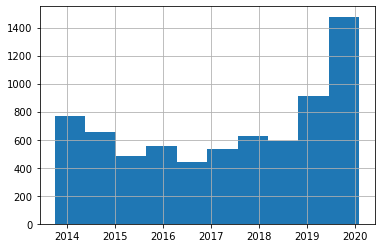

In [20]:
contract['BeginDate'].hist()

### Поле TotalCharges

In [ ]:
def present(count__x_percent, count_100_percent):
    return 100/ (count_100_percent / count__x_percent)

Проверим, что дата начала  меньше даты конца

In [ ]:
contract['period_months'] = (contract['EndDate'] - contract['BeginDate']) / np.timedelta64(1, 'M')

In [ ]:
contract['period_months'].fillna((contract['EndDate'].max() - contract['BeginDate']) / np.timedelta64(1, 'M'), inplace=True)

In [ ]:
len(contract[contract['period_months'] < 0])

In [ ]:
present(len(contract[contract['period_months'] < 0]), len(contract))

Ошибку содержат 0.16% данных, исключим их из рассмотрения 

In [ ]:
contract.drop(contract[contract['period_months'] < 0].index, inplace=True)

Предположим, что поле TotalCharges - это лик (оно однозначно определяется другими полями)

In [ ]:
contract['my_TotalCharges'] = contract['period_months'] * contract['MonthlyCharges']

In [ ]:
contract[['BeginDate','EndDate','MonthlyCharges','my_TotalCharges','TotalCharges']].head()

In [ ]:
contract['EndDate'].max()

#### Вывод

Видно, что цифры похожи. В первой строке 0 потому, что дата начала совпадает с текущей датой. Исключим лик из данных. 

In [ ]:
contract = contract.drop(['my_TotalCharges', 'TotalCharges', 'period_months'], axis=1)

In [ ]:
contract.head()

In [ ]:
==========================================================

## Таблица personal

In [ ]:
personal = pd.read_csv('/datasets/final_provider/personal.csv')

In [ ]:
personal.head()

In [ ]:
personal.info()

## Таблица internet

In [ ]:
internet = pd.read_csv('/datasets/final_provider/internet.csv')

In [ ]:
internet.head()

In [ ]:
internet.info()

## Таблица phone

In [ ]:
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [ ]:
phone.head()

In [ ]:
phone.info()